In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_file = r'C:\Users\Rahul kashyap\Downloads\carvan_train.csv'
test_file = r'C:\Users\Rahul kashyap\Downloads\carvan_test.csv'
bd_train = pd.read_csv(train_file)
bd_test =pd.read_csv(test_file)

In [3]:
#bd_train.info()

In [4]:
bd_test['V86'] = np.nan
bd_train['data'] = 'train'
bd_test['data'] = 'test'

In [5]:
bd_test = bd_test[bd_train.columns]
bd_all = pd.concat([bd_train, bd_test], axis=0)

In [6]:
bd_all.isnull().sum()

V1         0
V2         0
V3         0
V4         0
V5         0
        ... 
V83        0
V84        0
V85        0
V86     4000
data       0
Length: 87, dtype: int64

In [7]:
bd_train['V4'].value_counts()

3    3000
2    1452
4    1073
5     193
1      74
6      30
Name: V4, dtype: int64

In [8]:
bd_all['V86'].value_counts(dropna = False)

0.0    5474
NaN    4000
1.0     348
Name: V86, dtype: int64

In [9]:
#Model building

In [10]:
bd_train.shape

(5822, 87)

In [11]:
bd_test.shape

(4000, 87)

In [12]:
del bd_train['data']
bd_test.drop(['V86', 'data'], axis=1, inplace=True)

In [13]:
bd_train.shape

(5822, 86)

In [14]:
bd_test.shape

(4000, 85)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [16]:
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
        'C':np.linspace(0.001,1000,10)}

In [17]:
model=LogisticRegression(fit_intercept=True)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
grid_search=GridSearchCV(model,param_grid=params,cv=5,scoring="f1",n_jobs=-1)

In [20]:
x_train = bd_train.drop('V86', axis=1)
y_train = bd_train['V86']

In [21]:
grid_search.fit(x_train,y_train)

C:\Users\Rahul kashyap\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Rahul kashyap\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000e-03, 1.11112e+02, 2.22223e+02, 3.33334e+02, 4.44445e+02,
       5.55556e+02, 6.66667e+02, 7.77778e+02, 8.88889e+02, 1.00000e+03]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_

In [22]:
grid_search.best_estimator_

LogisticRegression(C=111.11200000000001, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
grid_search.get_params().values()

dict_values([5, 'raise-deprecating', 1.0, None, False, True, 1, None, 100, 'warn', None, 'l2', None, 'warn', 0.0001, 0, False, LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), 'warn', -1, {'class_weight': ['balanced', None], 'penalty': ['l1', 'l2'], 'C': array([1.00000e-03, 1.11112e+02, 2.22223e+02, 3.33334e+02, 4.44445e+02,
       5.55556e+02, 6.66667e+02, 7.77778e+02, 8.88889e+02, 1.00000e+03])}, '2*n_jobs', True, False, 'f1', 0])

In [24]:
model=LogisticRegression(fit_intercept=True, C= 111.112, class_weight= 'balanced', penalty= 'l2')

In [25]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test2 = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42)

In [26]:
X_train1.shape

(4657, 85)

In [27]:
X_test1.shape

(1165, 85)

In [28]:
y_train1.shape

(4657,)

In [29]:
y_test2.shape

(1165,)

In [30]:
model.fit(X_train1, y_train1)

C:\Users\Rahul kashyap\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=111.112, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_predict = model.predict(X_test1)

In [32]:
y_predict

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score,fbeta_score,confusion_matrix

In [34]:
accuracy_score(y_test2, y_predict)

0.7356223175965665

In [35]:
test_preds = model.predict_proba(X_test1)[:,1]

In [36]:
test_preds

array([0.19513554, 0.15079201, 0.24297829, ..., 0.65982043, 0.42771423,
       0.14482662])

In [37]:
model.classes_

array([0, 1], dtype=int64)

In [38]:
train_score = model.predict_proba(X_train1)[:,1]

In [39]:
real = y_train1

In [40]:
cutoffs=np.linspace(0.001,0.999,999)

In [41]:
KS=[]

In [42]:
for cutoff in cutoffs:
    predicted = (train_score>cutoff).astype(int)
    
    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
      
    ks=(TP/P)-(FP/N)
    
    
    KS.append(ks)

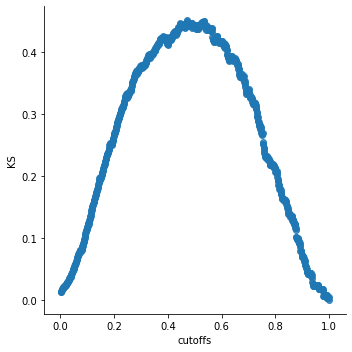

In [43]:
temp = pd.DataFrame({'cutoffs':cutoffs, 'KS': KS})

import seaborn as sns

sns.lmplot(x = 'cutoffs', y='KS', data=temp, fit_reg=False)

In [44]:
max(KS)

0.45103444157218053

In [45]:
cutoffs[KS==max(KS)]

array([0.471])

In [46]:
test_hard_classes = (test_preds>0.471).astype(int)

In [47]:
test_hard_classes.shape

(1165,)

In [48]:
y_predict.shape

(1165,)

In [49]:
accuracy_score(y_test2, test_hard_classes)

0.7047210300429184

In [50]:
fbeta_score(y_test2, y_predict, beta = 2)

0.409711684370258

In [51]:
fbeta_score(y_test2,test_hard_classes, beta = 2)

0.4005722460658083

In [52]:
mat = confusion_matrix(y_test2, y_predict)

In [53]:
mat

array([[803, 281],
       [ 27,  54]], dtype=int64)

In [54]:
bd_test.shape

(4000, 85)

In [55]:
final_pred = model.predict(bd_test)

In [56]:
final_pred.shape

(4000,)

In [57]:
#pd.DataFrame(final_pred).to_csv("Akshay_Valatkar_P2_Part2.csv")